In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
passmark = 40

In [3]:
df = pd.read_csv("StudentsPerformance.csv")

In [4]:
df['Total score']=df['math score']+df['reading score']+df['writing score']

In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [6]:
print (df.shape)

(1000, 9)


In [7]:
df.describe()

,math score,reading score,writing score,Total score
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,203.312000
std,15.16308,14.600192,15.195657,42.771978
min,0.00000,17.000000,10.000000,27.000000
25%,57.00000,59.000000,57.750000,175.000000
50%,66.00000,70.000000,69.000000,205.000000
75%,77.00000,79.000000,79.000000,233.000000
max,100.00000,100.000000,100.000000,300.000000


In [8]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
Total score                    0
dtype: int64

In [9]:
print("Average math score is    : {}".format(np.mean(df['math score'])))
print("Average reading score is : {}".format(np.mean(df['reading score'])))
print("Average writing score is : {}".format(np.mean(df['writing score'])))
print("Average total score is   : {}".format(np.mean(df['Total score'])/3))

Average math score is    : 66.089
Average reading score is : 69.169
Average writing score is : 68.054
Average total score is   : 67.77066666666667


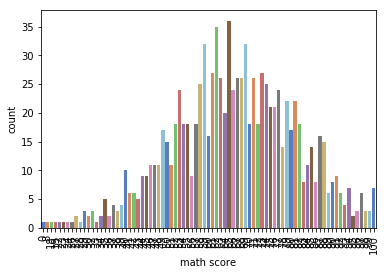

In [10]:
p = sns.countplot(x="math score", data = df, palette="muted")
_ = plt.setp(p.get_xticklabels(), rotation=90) 

In [11]:
df['Math_PassStatus'] = np.where(df['math score']<passmark, 'F', 'P')
df.Math_PassStatus.value_counts()

P    960
F     40
Name: Math_PassStatus, dtype: int64

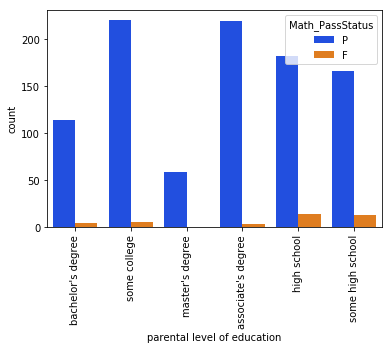

In [12]:
p = sns.countplot(x='parental level of education', data = df, hue='Math_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 

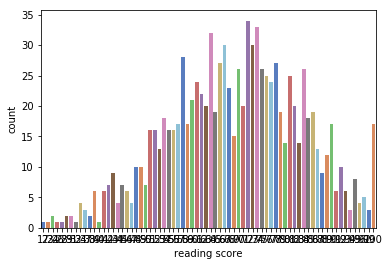

P    974
F     26
Name: Reading_PassStatus, dtype: int64

In [13]:
sns.countplot(x="reading score", data = df, palette="muted")
plt.show()
df['Reading_PassStatus'] = np.where(df['reading score']<passmark, 'F', 'P')
df.Reading_PassStatus.value_counts()

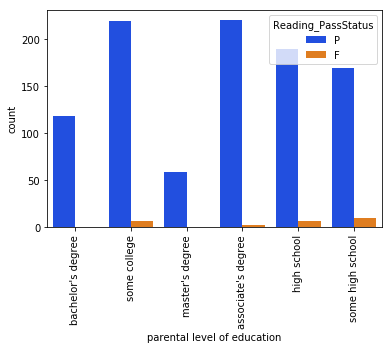

In [14]:
p = sns.countplot(x='parental level of education', data = df, hue='Reading_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90)

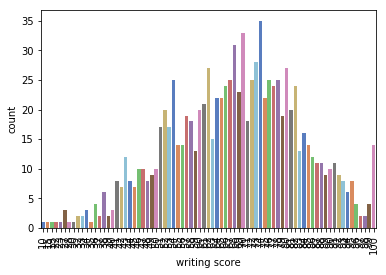

In [15]:
p = sns.countplot(x="writing score", data = df, palette="muted")
_ = plt.setp(p.get_xticklabels(), rotation=90) 

In [16]:
df['Writing_PassStatus'] = np.where(df['writing score']<passmark, 'F', 'P')
df.Writing_PassStatus.value_counts()

P    968
F     32
Name: Writing_PassStatus, dtype: int64

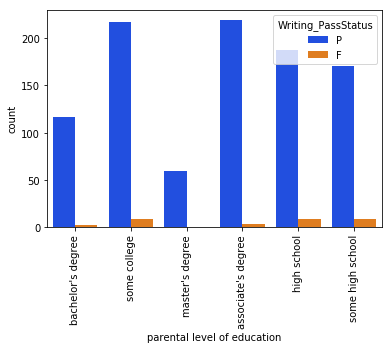

In [17]:
p = sns.countplot(x='parental level of education', data = df, hue='Writing_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 

In [18]:
df['OverAll_PassStatus'] = df.apply(lambda x : 'F' if x['Math_PassStatus'] == 'F' or 
                                    x['Reading_PassStatus'] == 'F' or x['Writing_PassStatus'] == 'F' else 'P', axis =1)

df.OverAll_PassStatus.value_counts()

P    949
F     51
Name: OverAll_PassStatus, dtype: int64

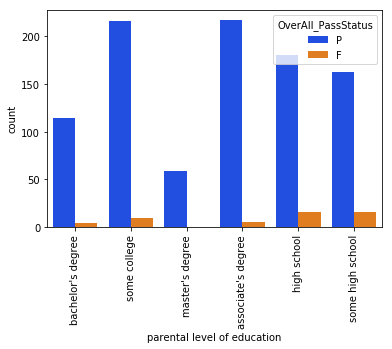

In [19]:
p = sns.countplot(x='parental level of education', data = df, hue='OverAll_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90)

In [20]:
df['Total_Marks'] = df['math score']+df['reading score']+df['writing score']
df['Percentage'] = df['Total_Marks']/3


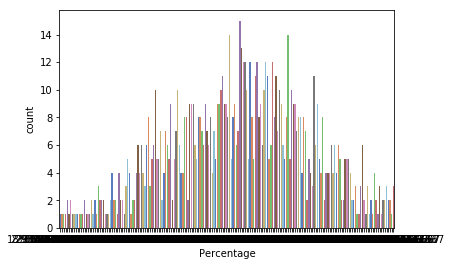

In [21]:
p = sns.countplot(x="Percentage", data = df, palette="muted")
_ = plt.setp(p.get_xticklabels(), rotation=0) 

C:\Users\DELL\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


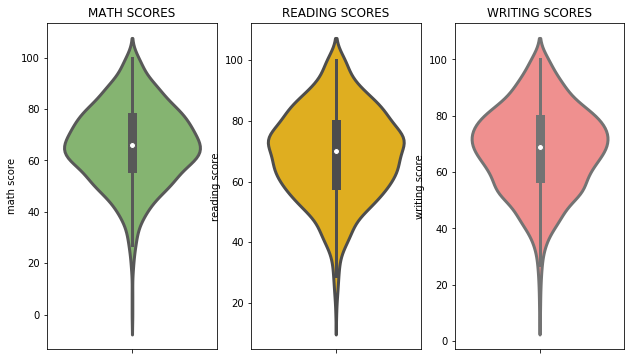

In [22]:
plt.figure(figsize=(14,6))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,palette='summer',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,palette='Wistia_r',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,palette='spring',linewidth=3)
plt.show()

In [23]:
df.groupby(['race/ethnicity','parental level of education']).mean()


math score  reading score  \
race/ethnicity parental level of education                              
group A        associate's degree            61.000000      67.071429   
               bachelor's degree             67.166667      68.083333   
               high school                   60.444444      62.888889   
               master's degree               57.666667      64.666667   
               some college                  63.888889      65.777778   
               some high school              58.916667      62.083333   
group B        associate's degree            66.097561      69.585366   
               bachelor's degree             69.300000      72.950000   
               high school                   59.791667      63.458333   
               master's degree               67.166667      80.166667   
               some college                  63.189189      65.756757   
               some high school              61.815789      66.447368   
group C        associate's degree            66.730769      71.128205   
               bachelor's degree             68.150000      75.675000   
               high school                   60.906250      64.421875   
               master's degree               67.052632      70.526316   
               some college                  65.130435      69.420290   
               some high school              60.551020      65.632653   
group D        associate's degree            67.600000      70.540000   
               bachelor's degree             67.571429      70.142857   
               high school                   62.863636      64.409091   
               master's degree               72.521739      77.173913   
               some college                  68.731343      70.880597   
               some high school              66.760000      69.980000   
group E        associate's degree            74.897436      73.820513   
               bachelor's degree             76.555556      74.833333   
               high school                   70.772727      70.318182   
               master's degree               74.625000      82.125000   
               some college                  73.828571      72.628571   
               some high school              72.111111      69.555556   

                                            writing score  Total score  \
race/ethnicity parental level of education                               
group A        associate's degree               63.571429   191.642857   
               bachelor's degree                68.333333   203.583333   
               high school                      60.500000   183.833333   
               master's degree                  67.666667   190.000000   
               some college                     65.000000   194.666667   
               some high school                 58.583333   179.583333   
group B        associate's degree               68.243902   203.926829   
               bachelor's degree                71.650000   213.900000   
               high school                      61.250000   184.500000   
               master's degree                  77.166667   224.500000   
               some college                     64.189189   193.135135   
               some high school                 64.605263   192.868421   
group C        associate's degree               70.269231   208.128205   
               bachelor's degree                75.900000   219.725000   
               high school                      61.656250   186.984375   
               master's degree                  69.526316   207.105263   
               some college                     68.869565   203.420290   
               some high school                 63.285714   189.469388   
group D        associate's degree               69.860000   208.000000   
               bachelor's degree                71.892857   209.607143   
               high school                      63.159091   190.431818   
     

In [24]:
df.groupby(['gender']).mean()

,math score,reading score,writing score,Total score,Total_Marks,Percentage
gender,,,,,,
female,63.633205,72.608108,72.467181,208.708494,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,197.512448,65.837483


In [25]:
course_gender = df.groupby(['gender','test preparation course']).mean().reset_index()

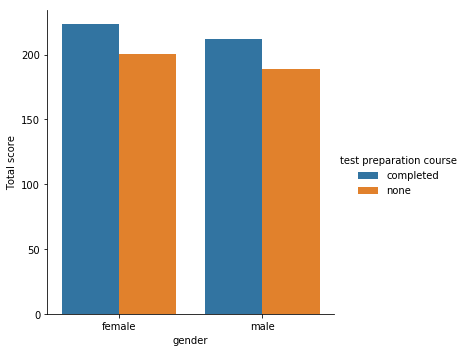

In [26]:
sns.catplot(x='gender', y='Total score', hue='test preparation course', data=course_gender, kind='bar')

C:\Users\DELL\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


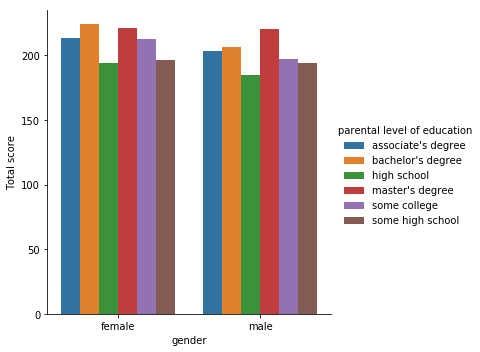

In [27]:
course_gender = df.groupby(['gender','parental level of education']).mean().reset_index()
sns.factorplot(x='gender', y='Total score', hue='parental level of education', data=course_gender, kind='bar')

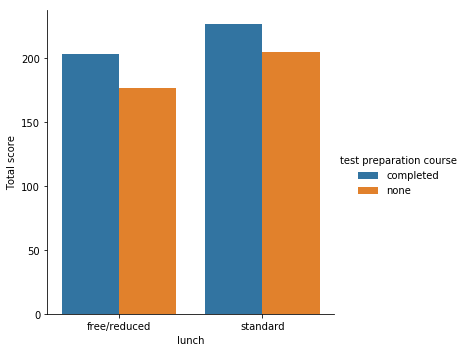

In [28]:
Lunch_course = df.groupby(['lunch','test preparation course']).mean().reset_index()
sns.catplot(x='lunch', y='Total score', hue='test preparation course', data=Lunch_course, kind='bar')

In [29]:
for i in range(len(df)):
    if df.iloc[i,2] in ['high school', 'some high school']:
        df.iloc[i,2] = 'No_Degree'
    else:
        df.iloc[i,2] = 'has_Degree'

In [30]:
df.sample()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total score,Math_PassStatus,Reading_PassStatus,Writing_PassStatus,OverAll_PassStatus,Total_Marks,Percentage
459,male,group B,No_Degree,standard,completed,72,65,68,205,P,P,P,P,205,68.333333


In [31]:
df['parental level of education'].value_counts()

has_Degree    625
No_Degree     375
Name: parental level of education, dtype: int64

C:\Users\DELL\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


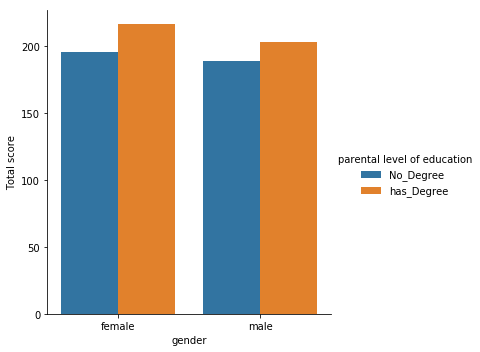

In [32]:
course_gender = df.groupby(['gender','parental level of education']).mean().reset_index()
sns.factorplot(x='gender', y='Total score', hue='parental level of education', data=course_gender, kind='bar')

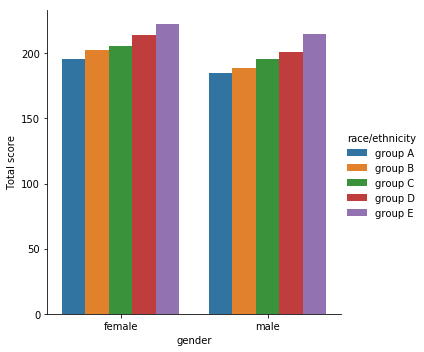

In [33]:
race_gender = df.groupby(['gender','race/ethnicity']).mean().reset_index()
sns.catplot(x='gender', y='Total score', hue='race/ethnicity', data=race_gender, kind='bar')

In [34]:
final_df = df.groupby(['gender','parental level of education','test preparation course','lunch','race/ethnicity']).mean().reset_index()
after_sort = final_df.sort_values(by= ['Total score'],ascending = False)
after_sort.drop(columns=['math score','reading score','writing score'],inplace = True)
after_sort

,gender,parental level of education,test preparation course,lunch,race/ethnicity,Total score,Total_Marks,Percentage
28,female,has_Degree,completed,standard,group E,252.071429,252.071429,84.023810
5,female,No_Degree,completed,standard,group A,248.000000,248.000000,82.666667
66,male,has_Degree,completed,standard,group C,239.941176,239.941176,79.980392
27,female,has_Degree,completed,standard,group D,239.214286,239.214286,79.738095
65,male,has_Degree,completed,standard,group B,237.300000,237.300000,79.100000
26,female,has_Degree,completed,standard,group C,235.027778,235.027778,78.342593
64,male,has_Degree,completed,standard,group A,233.285714,233.285714,77.761905
8,female,No_Degree,completed,standard,group D,229.700000,229.700000,76.566667
25,female,has_Degree,completed,standard,group B,229.666667,229.666667,76.555556
23,female,has_Degree,completed,free/reduced,group E,229.200000,229.200000,76.400000


In [35]:
after_sort.tail()

,gender,parental level of education,test preparation course,lunch,race/ethnicity,Total score,Total_Marks,Percentage
41,male,No_Degree,completed,free/reduced,group C,157.250000,157.250000,52.416667
10,female,No_Degree,none,free/reduced,group A,156.200000,156.200000,52.066667
12,female,No_Degree,none,free/reduced,group C,151.823529,151.823529,50.607843
40,male,No_Degree,completed,free/reduced,group B,151.000000,151.000000,50.333333
50,male,No_Degree,none,free/reduced,group B,136.000000,136.000000,45.333333


In [36]:
print("Top students Performance \n",after_sort[:10])

Top students Performance 
     gender parental level of education test preparation course         lunch  \
28  female                  has_Degree               completed      standard   
5   female                   No_Degree               completed      standard   
66    male                  has_Degree               completed      standard   
27  female                  has_Degree               completed      standard   
65    male                  has_Degree               completed      standard   
26  female                  has_Degree               completed      standard   
64    male                  has_Degree               completed      standard   
8   female                   No_Degree               completed      standard   
25  female                  has_Degree               completed      standard   
23  female                  has_Degree               completed  free/reduced   

   race/ethnicity  Total score  Total_Marks  Percentage  
28        group E   252.071429   2

In [37]:
print("Bottom students Performance \n",after_sort[-10:][::-1])

Bottom students Performance 
     gender parental level of education test preparation course         lunch  \
50    male                   No_Degree                    none  free/reduced   
40    male                   No_Degree               completed  free/reduced   
12  female                   No_Degree                    none  free/reduced   
10  female                   No_Degree                    none  free/reduced   
41    male                   No_Degree               completed  free/reduced   
11  female                   No_Degree                    none  free/reduced   
53    male                   No_Degree                    none  free/reduced   
49    male                   No_Degree                    none  free/reduced   
70    male                  has_Degree                    none  free/reduced   
54    male                   No_Degree                    none      standard   

   race/ethnicity  Total score  Total_Marks  Percentage  
50        group B   136.000000 